In [ ]:
import pandas as pd
import numpy as np

# visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# modelling and evaluation libraries
from sklearn.preprocessing import  StandardScaler , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.decomposition import  PCA
from sklearn.ensemble import  RandomForestClassifier , RandomForestRegressor
from sklearn.metrics import confusion_matrix,  accuracy_score, classification_report, mean_squared_error, r2_score,ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter



import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('earthquakes.csv')
df

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,us6000ldpm,6.3,earthquake,"M 6.3 - 25 km NNE of Zindah Jān, Afghanistan",2023-10-07T07:12:49,1696662769702,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,11,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,staked.radish.enduringly,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1133,us6000ldph,5.4,earthquake,"M 5.4 - 26 km NE of Zindah Jān, Afghanistan",2023-10-07T06:49:41,1696661381156,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,bloomers.wondrous.possibility,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1134,us6000ldpg,6.3,earthquake,"M 6.3 - 32 km NNE of Zindah Jān, Afghanistan",2023-10-07T06:41:03,1696660863327,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,19,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,outshone.freedmen.inequality,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1135,us6000lcgj,5.7,earthquake,"M 5.7 - 39 km NE of Dipayal, Nepal",2023-10-03T09:21:03,1696324863018,1702589211040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,131,...,"Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,NaN,investments.ticketholder.hopefulness,345,"[{'id': '87376', 'wikidataId': '', 'name': 'As..."


In [ ]:
#basic overview of data
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   int64  
 6   updated          1137 non-null   int64  
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            764 non-null    object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

In [ ]:
# Analyzing earthquakes with significant magnitudes
significant_earthquakes = df[df['magnitude'] >= 7]
print("Number of significant earthquakes (Magnitude >= 7):", len(significant_earthquakes))
print(significant_earthquakes[['place', 'magnitude', 'date', 'depth']].head())

Number of significant earthquakes (Magnitude >= 7): 19
                                        place  magnitude                 date  \
117                128 km WNW of Aykol, China        7.0  2024-01-22T18:09:04   
137      2024 Hyuganada Sea, Japan Earthquake        7.1  2024-08-08T07:42:55   
169           15 km S of Hualien City, Taiwan        7.4  2024-04-02T23:58:12   
181     2024 Noto Peninsula, Japan Earthquake        7.5  2024-01-01T07:10:09   
221  41 km ESE of San Pedro de Atacama, Chile        7.4  2024-07-19T01:50:48   

       depth  
117   13.000  
137   24.000  
169   40.000  
181   10.000  
221  127.291  


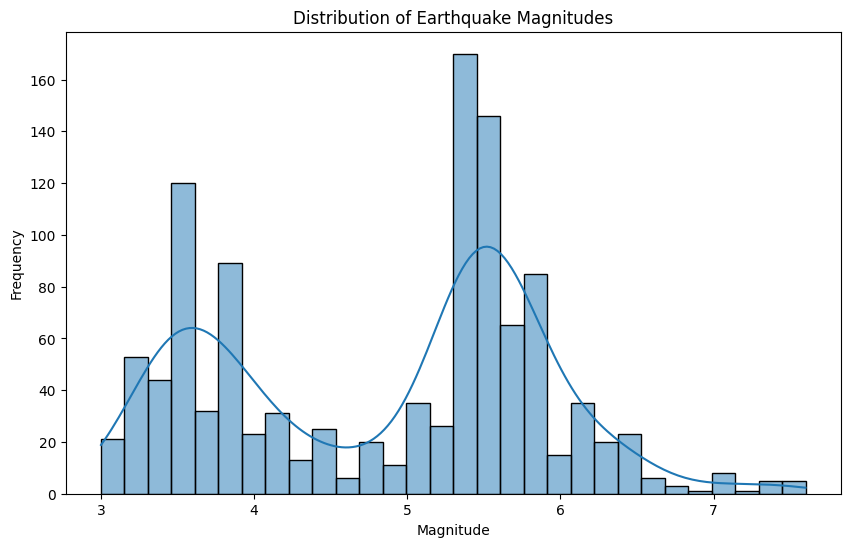

In [ ]:
# Plotting earthquake magnitudes
plt.figure(figsize=(10,6))
sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

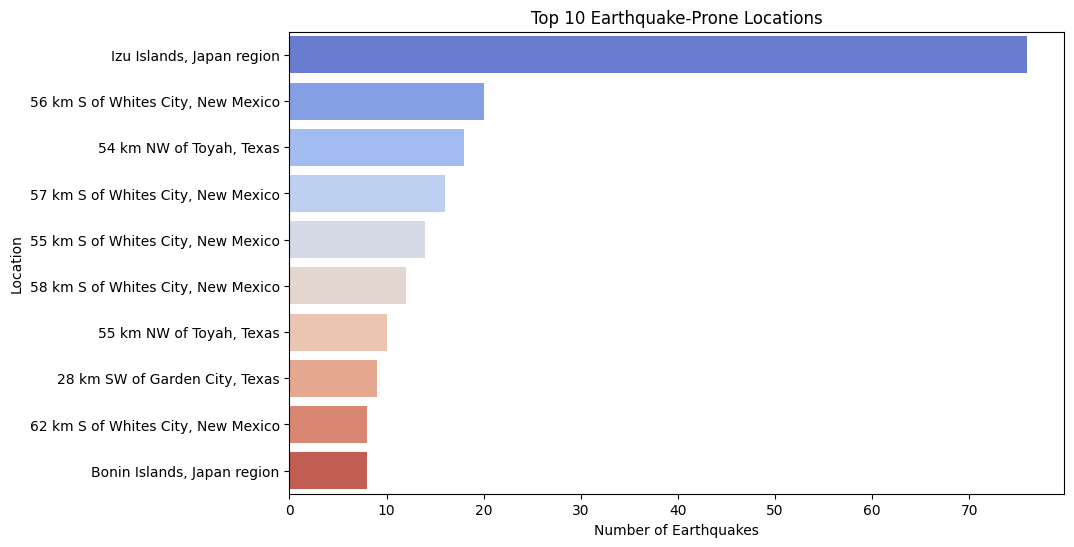

In [ ]:
# Top 10 earthquake-prone locations by frequency
top_locations = df['place'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title('Top 10 Earthquake-Prone Locations')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location')
plt.show()

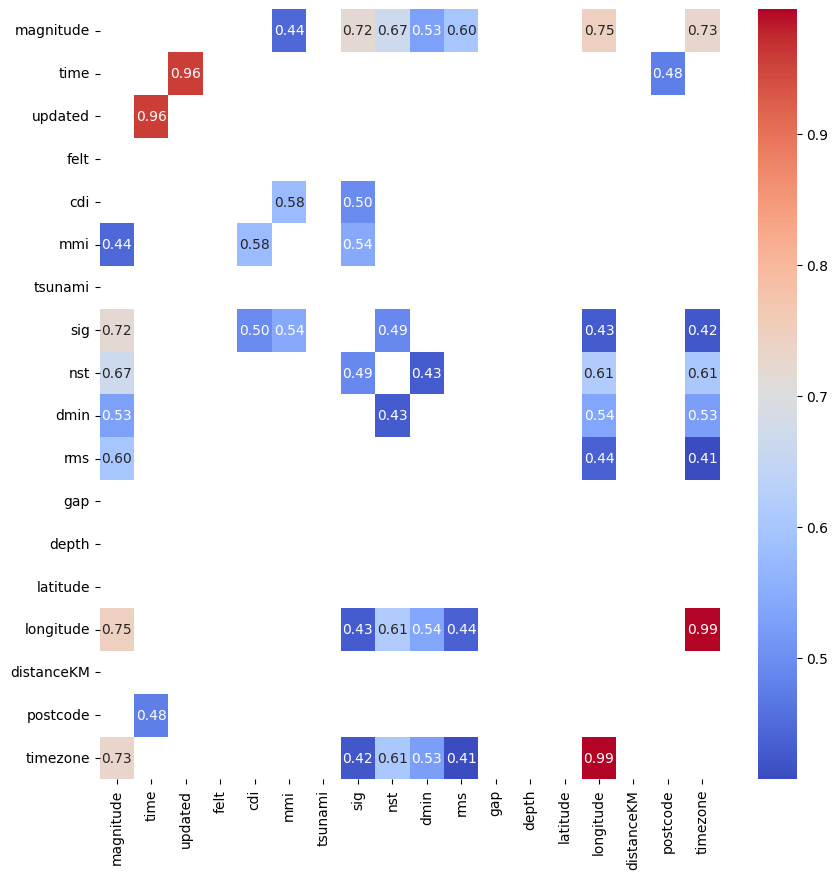

In [ ]:
# get correlation matrix
corr_matrx = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
# Applying Threshold bases mask
threshold = 0.4
mask = (corr_matrx < threshold) & (corr_matrx != 1)

sns.heatmap(corr_matrx[corr_matrx != 1],annot=True,fmt='0.2f',cmap='coolwarm',mask=mask)
plt.show()


In [ ]:
# Dropping unusful Features
useful_col = ['magnitude','felt','cdi','mmi','alert','tsunami','sig','rms', 'gap','location',
              'magType', 'depth', 'latitude', 'longitude'] # --> target ['alert'] ['tsunami'] ['magnitude]

unuseful_col = ['type', 'date','time','updated','url', 'detailurl','net','code','sources','types','nst', 'dmin','gap',
 'place','distanceKM', 'placeOnly', 'continent', 'country','subnational', 'city', 'locality',
 'postcode', 'what3words', 'timezone','locationDetails']

In [ ]:
#handling missing data
# print Missing data number
print('Missing Data = ',df.isna().sum().sum())

Missing Data =  2805


In [ ]:
# lambda funcion to get columns with missing data
missing_cols = df.columns[df.apply(lambda x : x.isnull().sum() != 0)].to_list()
missing_cols

['alert', 'continent', 'country', 'subnational', 'city', 'postcode']

In [ ]:
df['alert'] = df['alert'].str.lower()
df.alert.unique()

array(['green', nan, 'yellow', 'red', 'orange'], dtype=object)

In [ ]:
df['status'] = df['status'].str.lower()
df.status.unique()

array(['reviewed', 'automatic'], dtype=object)

In [ ]:
#threshold uding mean
print("Mean of Green Alert Magnitude  = ",df[df.alert == 'green']['magnitude'].mean())
print("Mean of Red Alert Magnitude  = ",df[df.alert == 'red']['magnitude'].mean())
print("Mean of Orange Alert Magnitude  = ",df[df.alert == 'orange']['magnitude'].mean())
print("Mean of Yellow Alert Magnitude  = ",df[df.alert == 'yellow']['magnitude'].mean())

Mean of Green Alert Magnitude  =  5.388537271448664
Mean of Red Alert Magnitude  =  6.888888888888889
Mean of Orange Alert Magnitude  =  6.3
Mean of Yellow Alert Magnitude  =  6.273684210526317


In [ ]:
#threshold using percentile
percentiles = df['magnitude'].quantile([0.25, 0.5, 0.75, 0.9]).values
percentiles[0] ,percentiles[1],percentiles[2],percentiles[3]

(3.8, 5.3, 5.6, 6.0)

In [ ]:
# Function to fill NaN based on magnitude.
def impute_alert_based_on_magnitude(row):
    if pd.isna(row['alert']):
        if  row['magnitude'] >= percentiles[3]: # Top 10% as Red
            return 'red'
        elif row['magnitude'] >= percentiles[2]: # Top 25% as Orange
            return 'orange'
        elif row['magnitude'] >= percentiles[1]: # Median as Yellow
            return 'yellow'
        else:                                    # Bottom 50% as Green
            return 'green'
    else:
        return row['alert']

# apply the function
df['alert'] = df.apply(impute_alert_based_on_magnitude,axis=1)

In [ ]:
df['alert'].isna().sum()

0

In [ ]:
#removing duplicates
print('Duplicated Data = ',df.duplicated().sum())
# Drop the Duplicates
df = df.drop_duplicates()

Duplicated Data =  337


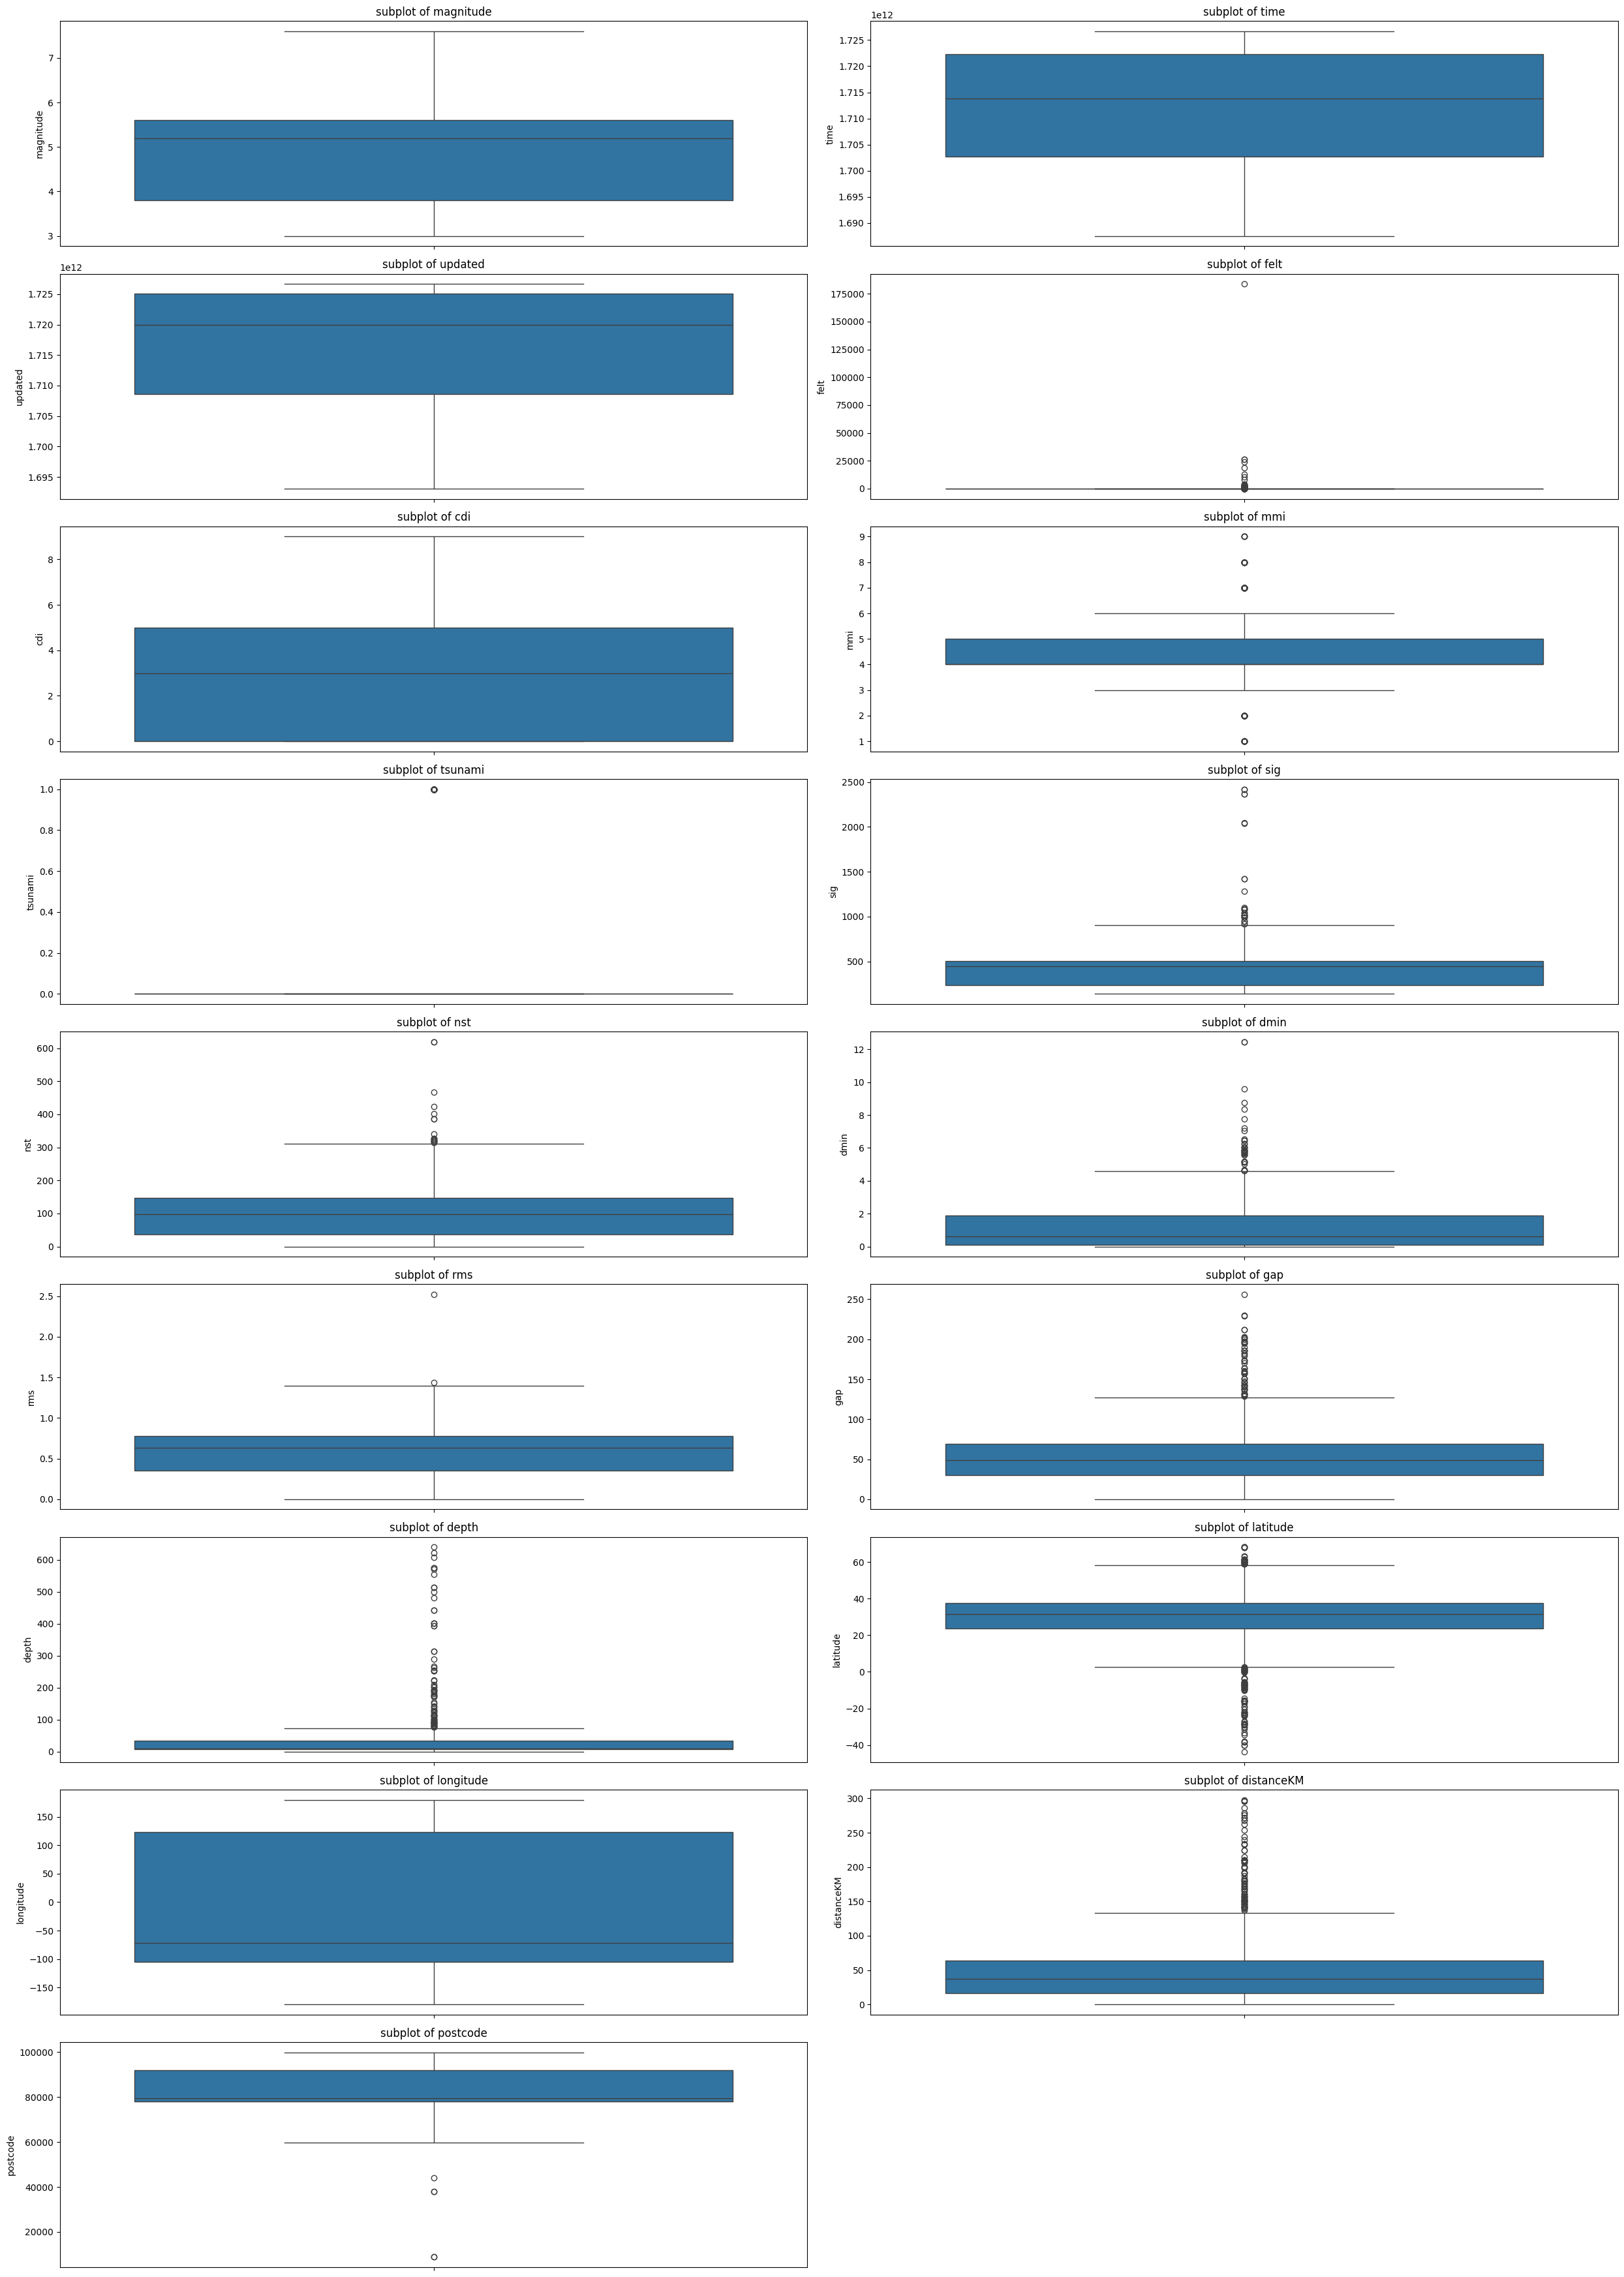

In [ ]:
#outliers
# numerics cols = 18 col
fign, axesn = plt.subplots(nrows=9, ncols=2, figsize=(25, 35))
axesn = axesn.flatten()
df_num = df.select_dtypes(include=['int64','float64'])
for i , col in enumerate(df_num.columns):
    sns.boxplot(data = df,y=col,ax=axesn[i])
    axesn[i].set_title(f'subplot of {col}')

plt.delaxes(axesn[-1])
plt.tight_layout()
plt.show()

In [ ]:
# Data Frame after Initial feature selection
df_FS0 = df[useful_col]

In [ ]:
df_FS0_num = df_FS0.select_dtypes(include=['int64','float64'])
# initialize scaler
scaler = MinMaxScaler()
df_FS0_num_scaled =scaler.fit_transform(df_FS0_num)
df_FS0[df_FS0_num.columns] = df_FS0_num_scaled
df_FS0

,magnitude,felt,cdi,mmi,alert,tsunami,sig,rms,gap,location,magType,depth,latitude,longitude
0,0.391304,0.010300,0.666667,0.500,green,0.0,0.375274,0.190476,0.273438,"Ackerly, Texas",mww,0.006712,0.680221,0.216141
1,0.456522,0.011111,0.666667,0.500,green,0.0,0.395441,0.039683,0.148438,"Ackerly, Texas",ml,0.009969,0.680360,0.216105
2,0.152174,0.008597,0.444444,0.375,green,0.0,0.198597,0.111111,0.386719,"Malibu, CA",ml,0.017429,0.695142,0.169549
3,0.195652,0.000027,0.333333,0.375,green,0.0,0.042964,0.039683,0.253906,"Whites City, New Mexico",ml,0.010086,0.673505,0.209454
4,0.239130,0.000022,0.333333,0.375,green,0.0,0.053485,0.103175,0.261719,"Whites City, New Mexico",mb,0.014168,0.673373,0.209390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.478261,0.000473,0.444444,0.500,green,0.0,0.138097,0.325397,0.113281,"Bharatpur, Nepal",mb,0.040572,0.639727,0.735246
1125,0.500000,0.000027,0.444444,0.750,yellow,0.0,0.225340,0.273810,0.175781,"Bandar Abbas, Iran",mww,0.016022,0.638619,0.655637
1126,0.434783,0.000011,0.555556,0.625,green,0.0,0.108724,0.293651,0.175781,"Bandar Abbas, Iran",mww,0.016022,0.638127,0.655673
1127,0.543478,0.000038,0.444444,0.750,green,0.0,0.144673,0.269841,0.148438,"Bandar Abbas, Iran",mww,0.016022,0.638551,0.655802


In [ ]:
#encoding categorial data
df_FS0_cat = df_FS0.select_dtypes(include=['object'])
df_FS0_cat.nunique()

,0
alert,4
location,270
magType,9


In [ ]:
# ONE HOT ENCODING
alert_encoded = pd.get_dummies(df_FS0_cat,columns=['alert'],dtype='int')
print(alert_encoded)

# LABEL ENCODING
# initilize Label Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_FS0['LE_alert'] = LE.fit_transform(df_FS0['alert'])
print(df_FS0['LE_alert'])

                     location magType  alert_green  alert_orange  alert_red  \
0              Ackerly, Texas     mww            1             0          0   
1              Ackerly, Texas      ml            1             0          0   
2                  Malibu, CA      ml            1             0          0   
3     Whites City, New Mexico      ml            1             0          0   
4     Whites City, New Mexico      mb            1             0          0   
...                       ...     ...          ...           ...        ...   
1124         Bharatpur, Nepal      mb            1             0          0   
1125       Bandar Abbas, Iran     mww            0             0          0   
1126       Bandar Abbas, Iran     mww            1             0          0   
1127       Bandar Abbas, Iran     mww            1             0          0   
1135           Dipayal, Nepal     mww            1             0          0   

      alert_yellow  
0                0  
1        

In [ ]:
# Drop categorical colums after encoding them
df_FS0 = df_FS0.drop(columns='alert')
# concatenate dataFrame with elected features(numeric) with encoded categorical data
df_FS0_New = pd.concat([df_FS0,alert_encoded],axis=1)
df_FS0_New

,magnitude,felt,cdi,mmi,tsunami,sig,rms,gap,location,magType,depth,latitude,longitude,LE_alert,location,magType,alert_green,alert_orange,alert_red,alert_yellow
0,0.391304,0.010300,0.666667,0.500,0.0,0.375274,0.190476,0.273438,"Ackerly, Texas",mww,0.006712,0.680221,0.216141,0,"Ackerly, Texas",mww,1,0,0,0
1,0.456522,0.011111,0.666667,0.500,0.0,0.395441,0.039683,0.148438,"Ackerly, Texas",ml,0.009969,0.680360,0.216105,0,"Ackerly, Texas",ml,1,0,0,0
2,0.152174,0.008597,0.444444,0.375,0.0,0.198597,0.111111,0.386719,"Malibu, CA",ml,0.017429,0.695142,0.169549,0,"Malibu, CA",ml,1,0,0,0
3,0.195652,0.000027,0.333333,0.375,0.0,0.042964,0.039683,0.253906,"Whites City, New Mexico",ml,0.010086,0.673505,0.209454,0,"Whites City, New Mexico",ml,1,0,0,0
4,0.239130,0.000022,0.333333,0.375,0.0,0.053485,0.103175,0.261719,"Whites City, New Mexico",mb,0.014168,0.673373,0.209390,0,"Whites City, New Mexico",mb,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.478261,0.000473,0.444444,0.500,0.0,0.138097,0.325397,0.113281,"Bharatpur, Nepal",mb,0.040572,0.639727,0.735246,0,"Bharatpur, Nepal",mb,1,0,0,0
1125,0.500000,0.000027,0.444444,0.750,0.0,0.225340,0.273810,0.175781,"Bandar Abbas, Iran",mww,0.016022,0.638619,0.655637,3,"Bandar Abbas, Iran",mww,0,0,0,1
1126,0.434783,0.000011,0.555556,0.625,0.0,0.108724,0.293651,0.175781,"Bandar Abbas, Iran",mww,0.016022,0.638127,0.655673,0,"Bandar Abbas, Iran",mww,1,0,0,0
1127,0.543478,0.000038,0.444444,0.750,0.0,0.144673,0.269841,0.148438,"Bandar Abbas, Iran",mww,0.016022,0.638551,0.655802,0,"Bandar Abbas, Iran",mww,1,0,0,0


In [ ]:
# show correlation between the three target cols and other affecting features.
# Calculate the correlation matrix
corr_matrx = df_FS0_New.corr(numeric_only=True)

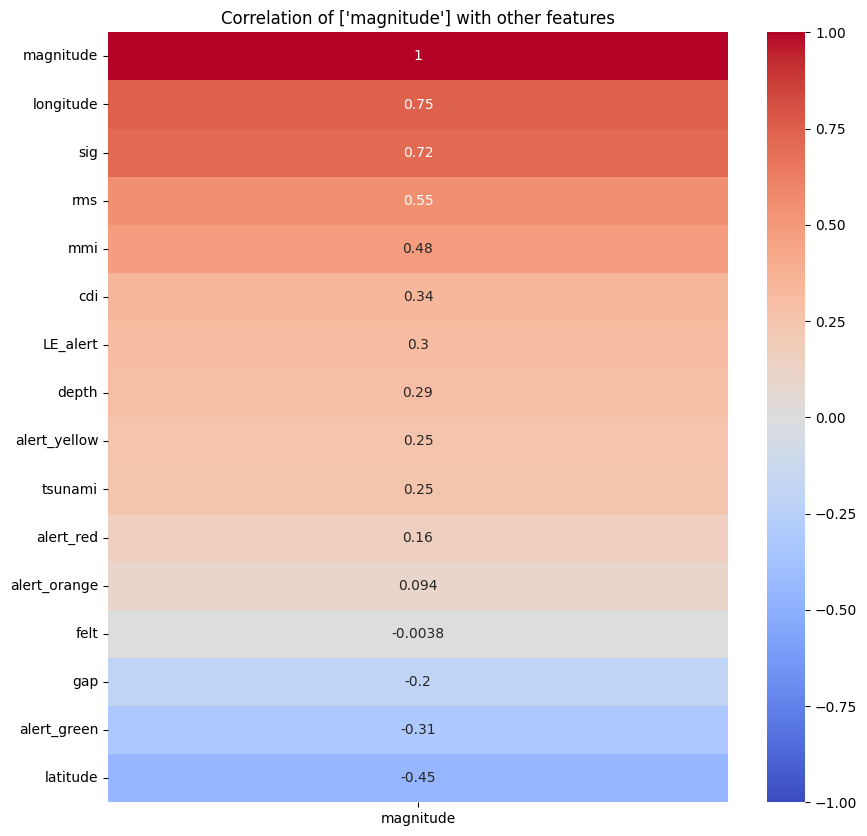

In [ ]:
# Get the correlations between the target column and all other features
#function to get corr with single col
def corr_with_target(df,target): # insert data frame, target col
    corr_matrx = df.corr(numeric_only=True)
    target_corr= corr_matrx[target].sort_values(by=target,ascending=False)
    plt.figure(figsize=(10,10))
    sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation of {target} with other features')
    plt.show()
    return target_corr
# 1-  magnitude col
mag_target_corr = corr_with_target(df=df_FS0_New,target=['magnitude'])

In [ ]:
# feature selection depending on heatmap result
mag_features = mag_target_corr.apply(lambda x: x[((x > 0.45) | (x < -0.45)) & (x != 1)]).index.to_list()

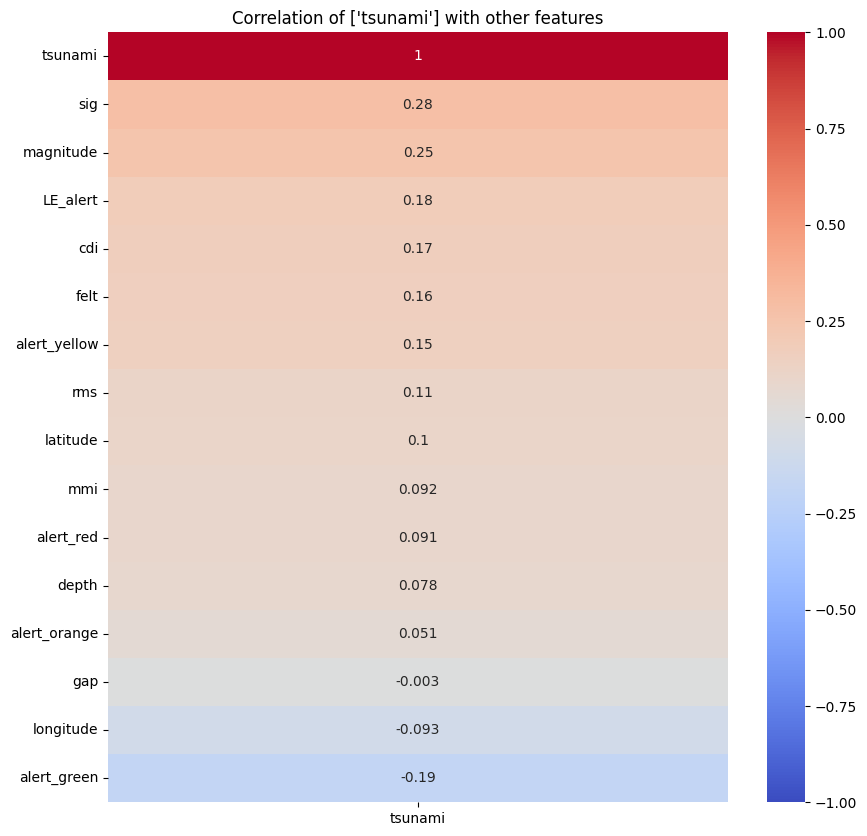

['sig',
 'magnitude',
 'LE_alert',
 'cdi',
 'felt',
 'alert_yellow',
 'rms',
 'latitude',
 'alert_green']

In [ ]:
# 1-  magnitude col
tsu_target_corr = corr_with_target(df=df_FS0_New,target=['tsunami'])
# feature selection depending on heatmap result
tsu_features = tsu_target_corr.apply(lambda x: x[((x > 0.1) | (x < -0.1)) & (x != 1)]).index.to_list()
tsu_features

In [ ]:
df_FS0_New.columns

Index(['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'rms', 'gap',
       'location', 'magType', 'depth', 'latitude', 'longitude', 'LE_alert',
       'location', 'magType', 'alert_green', 'alert_orange', 'alert_red',
       'alert_yellow'],
      dtype='object')

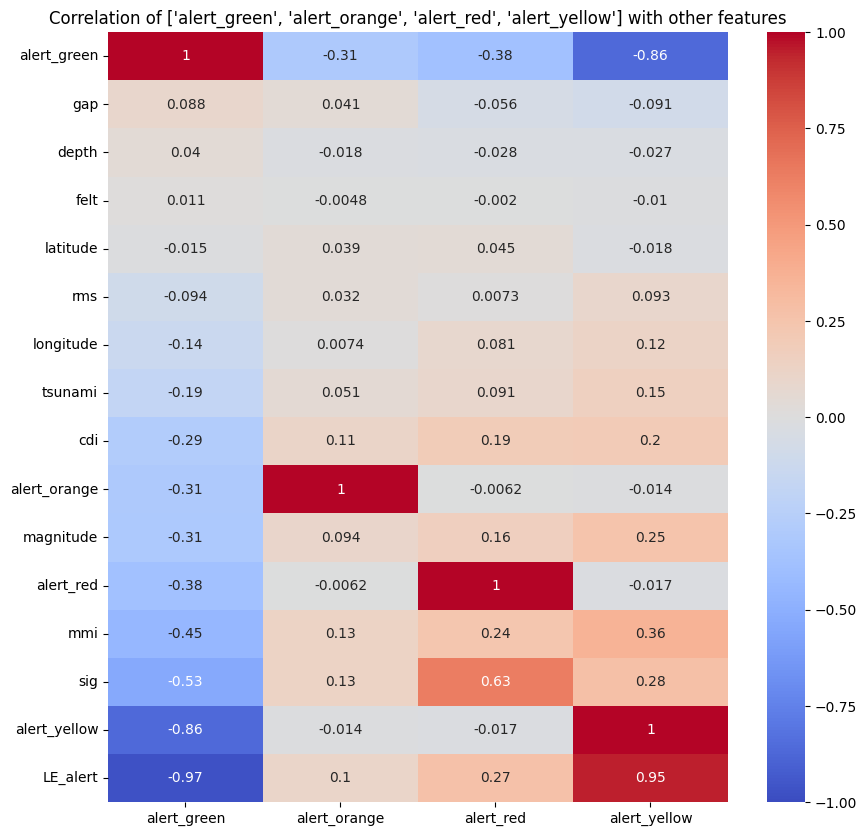

['LE_alert',
 'alert_green',
 'alert_orange',
 'alert_red',
 'alert_yellow',
 'cdi',
 'longitude',
 'magnitude',
 'mmi',
 'sig',
 'tsunami']

In [ ]:
# 1-  alert col
alert_feature = ['alert_green','alert_orange', 'alert_red', 'alert_yellow']
alr_target_corr = corr_with_target(df=df_FS0_New,target= alert_feature)
# feature selection depending on heatmap result
alr_features = alr_target_corr.apply(lambda x: x[((x > 0.1) | (x < -0.1)) & (x != 1)]).index.to_list()
alr_features

In [ ]:
# Define features and target variable
X = df_FS0_New[mag_features]
y = df_FS0_New['magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (using XGBoost for potential improvement)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Accuracy: {r2}")


Mean Squared Error: 0.002611072446922876
Root Mean Square Error (RMSE): 0.051098654061754664
Accuracy: 0.9478665931693593
